Adding latitude and longitude to plot cities on X/Y plane, and looking at month to month changes.  
Change country_of_interest below.

In [1]:
country_of_interest = "United States"

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sunshine-hours-for-cities-around-the-world/Sunshine hours for cities in the world.csv


In [3]:
fpath = r"/kaggle/input/sunshine-hours-for-cities-around-the-world/Sunshine hours for cities in the world.csv"
df = pd.read_csv(fpath)
df

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,New Zealand,Wellington,240.3,205.0,194.7,153.8,126.0,102.3,111.4,137.2,163.2,191.1,210.8,222.9,2058.7
388,New Zealand,Hamilton,229.8,192.9,193.3,165.1,138.3,112.8,126.4,144.1,147.5,174.8,187.1,207.6,2019.6
389,New Zealand,Auckland,228.8,194.9,189.2,157.3,139.8,110.3,128.1,142.9,148.6,178.1,188.1,197.2,2003.1
390,Fiji,Suva,192.2,178.0,170.5,153.0,145.7,141.0,136.4,142.6,135.0,164.3,168.0,195.3,1922.0


In [4]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [5]:
df = df[df["Country"]==country_of_interest]

In [6]:
def get_location(city, attr, debug=False):
    def log(data):
        if debug:
            print("{}: {}".format(city, data))
    try:
        if attr == "latitude":
            data = geolocator.geocode(city).latitude
            log(data)
            return data
        if attr == "longitude":
            data = geolocator.geocode(city).longitude
            log(data)
            return data
    except Exception as e:
        print(e)
        return float('NaN')

In [7]:
df["Latitude"] = df["City"].map(lambda x: get_location(x, "latitude"))

'NoneType' object has no attribute 'latitude'


/tmp/ipykernel_21/1104138985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Latitude"] = df["City"].map(lambda x: get_location(x, "latitude"))


In [8]:
df["Longitude"] = df["City"].map(lambda x: get_location(x, "longitude"))

'NoneType' object has no attribute 'longitude'


/tmp/ipykernel_21/32777514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Longitude"] = df["City"].map(lambda x: get_location(x, "longitude"))


In [9]:
new_df_list = []
for index, row in df.iterrows():
    for mon in months:
        temp = {"Country":row["Country"], "City":row["City"], "Latitude":row["Latitude"], "Longitude":row["Longitude"], "Month":mon, "Hours":row[mon]}
        new_df_list.append(temp)
new_df = pd.DataFrame(new_df_list)
new_df

,Country,City,Latitude,Longitude,Month,Hours
0,United States,Albuquerque,35.084103,-106.650985,Jan,234.2
1,United States,Albuquerque,35.084103,-106.650985,Feb,225.3
2,United States,Albuquerque,35.084103,-106.650985,Mar,270.2
3,United States,Albuquerque,35.084103,-106.650985,Apr,304.6
4,United States,Albuquerque,35.084103,-106.650985,May,347.4
...,...,...,...,...,...,...
643,United States,Yuma,32.665135,-114.476032,Aug,375.6
644,United States,Yuma,32.665135,-114.476032,Sep,341.7
645,United States,Yuma,32.665135,-114.476032,Oct,319.6
646,United States,Yuma,32.665135,-114.476032,Nov,270.1


In [10]:
df = new_df

In [11]:
df[df["Longitude"] > 125]

,Country,City,Latitude,Longitude,Month,Hours
468,United States,Richmond (VA),-32.8652,151.5012,Jan,172.5
469,United States,Richmond (VA),-32.8652,151.5012,Feb,179.7
470,United States,Richmond (VA),-32.8652,151.5012,Mar,233.3
471,United States,Richmond (VA),-32.8652,151.5012,Apr,261.6
472,United States,Richmond (VA),-32.8652,151.5012,May,288.0
473,United States,Richmond (VA),-32.8652,151.5012,Jun,306.4
474,United States,Richmond (VA),-32.8652,151.5012,Jul,301.4
475,United States,Richmond (VA),-32.8652,151.5012,Aug,278.9
476,United States,Richmond (VA),-32.8652,151.5012,Sep,237.9
477,United States,Richmond (VA),-32.8652,151.5012,Oct,222.8


Removing "Richmond (VA)" as the library doesn't interpret this correctly.
We could fix this, and manually enter in latitude and longitude.

In [12]:
df = df[df["City"] != "Richmond (VA)"]

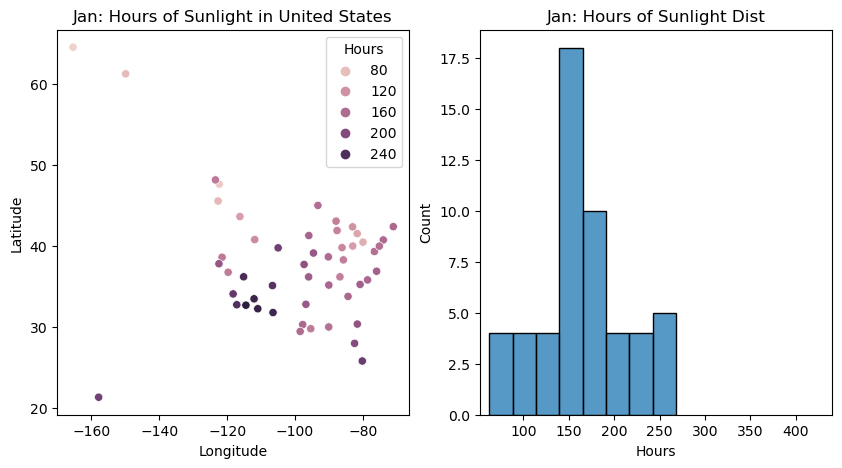

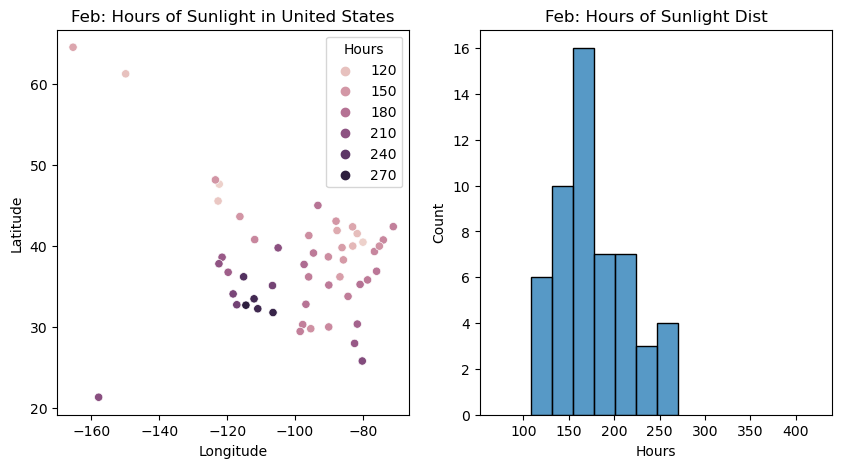

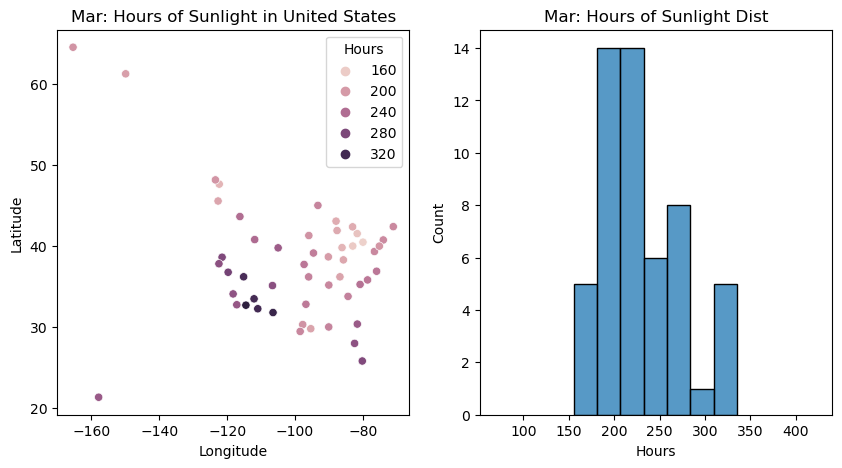

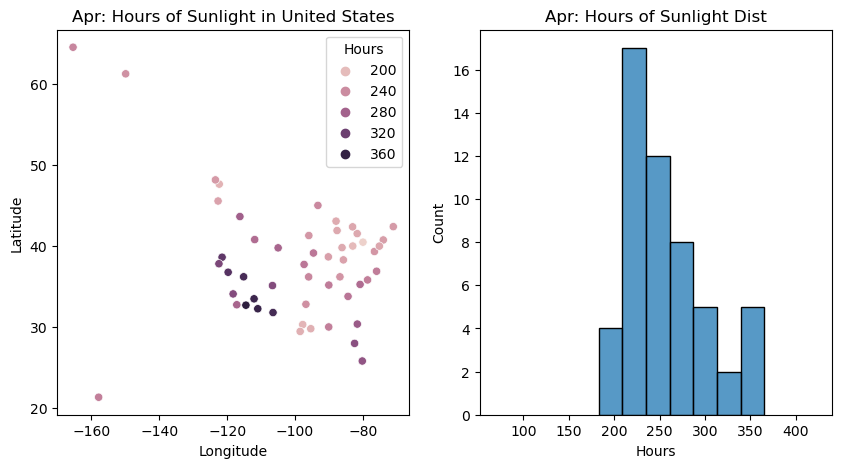

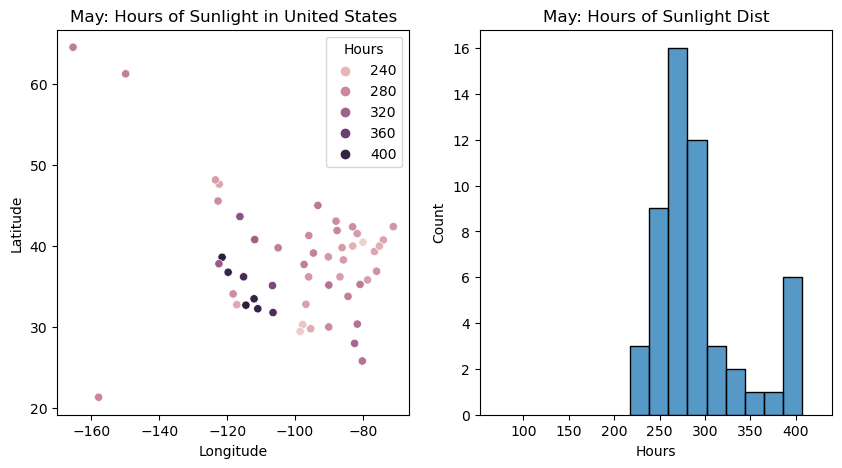

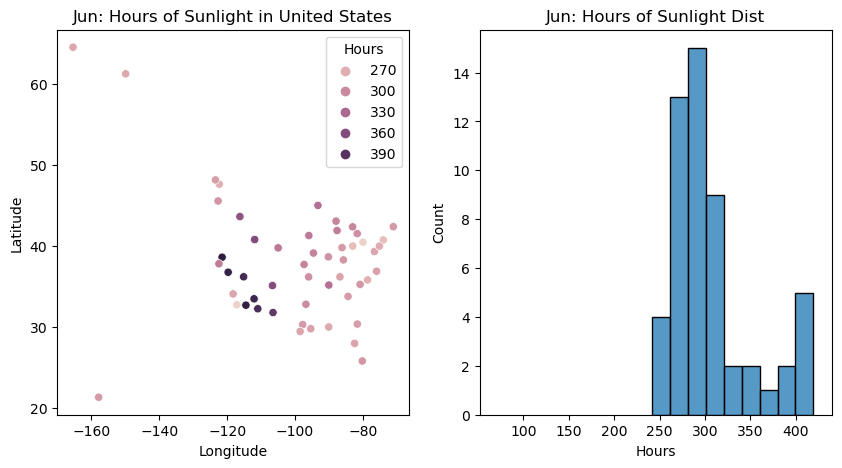

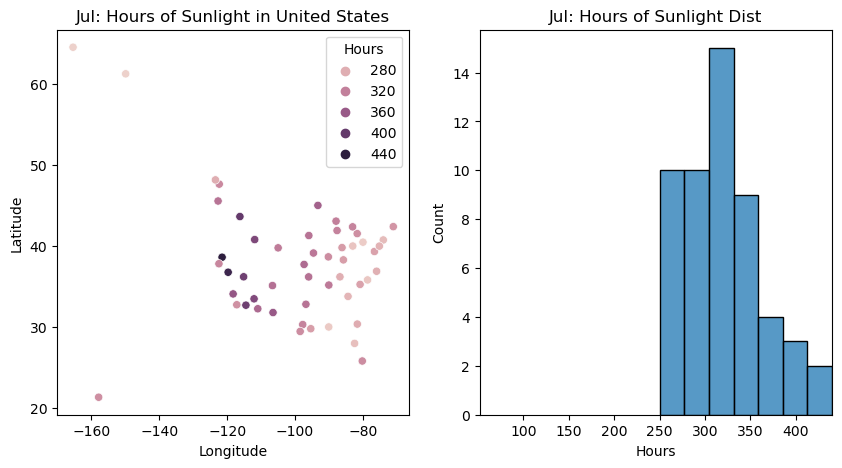

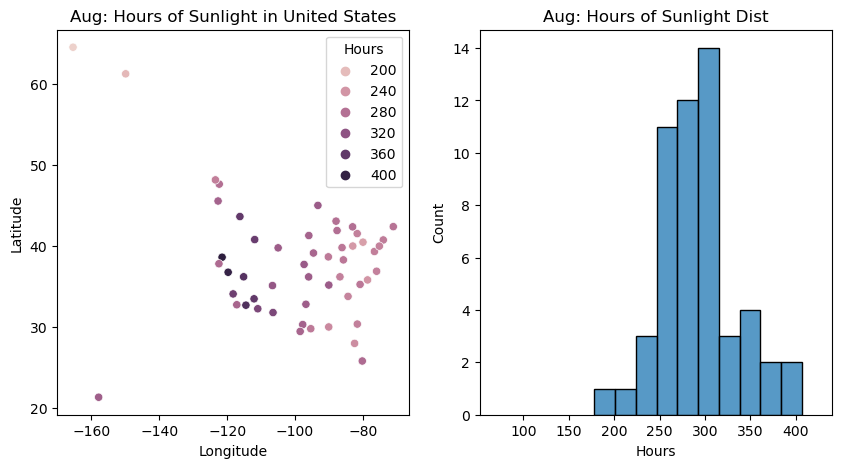

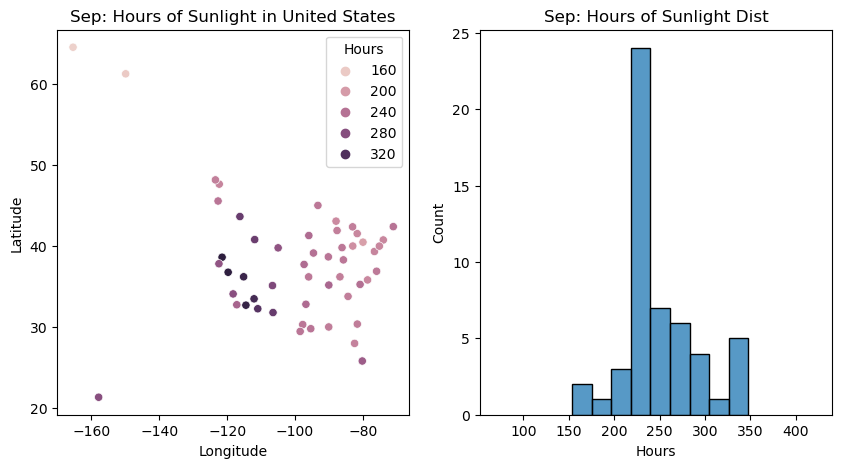

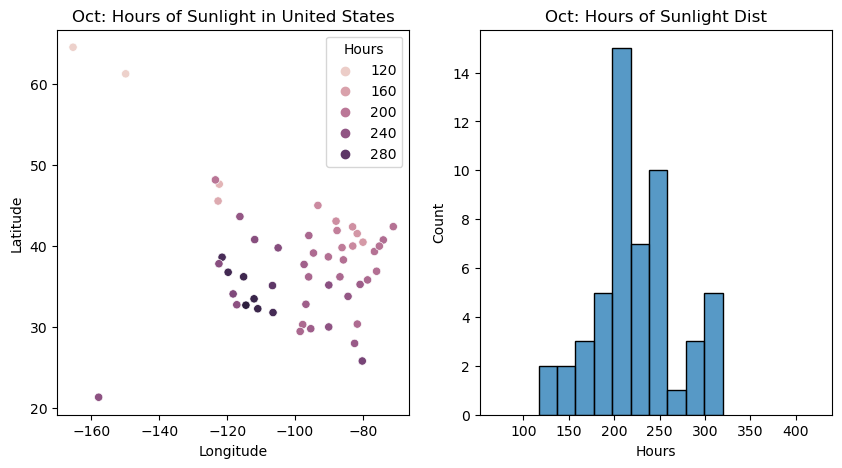

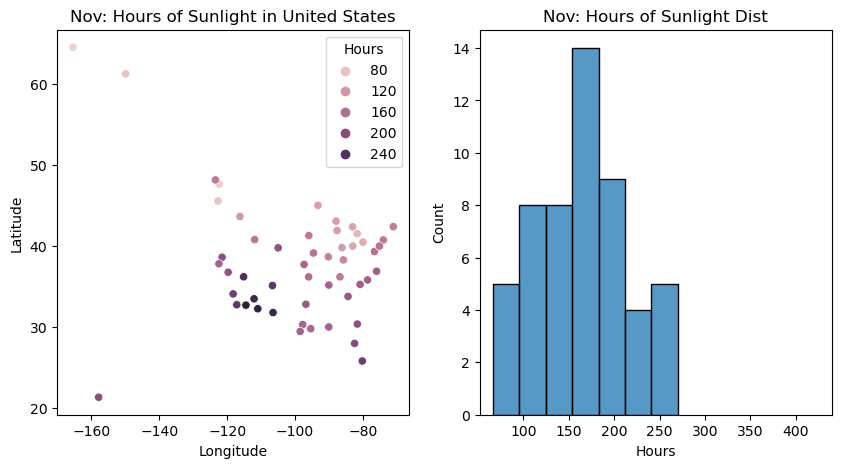

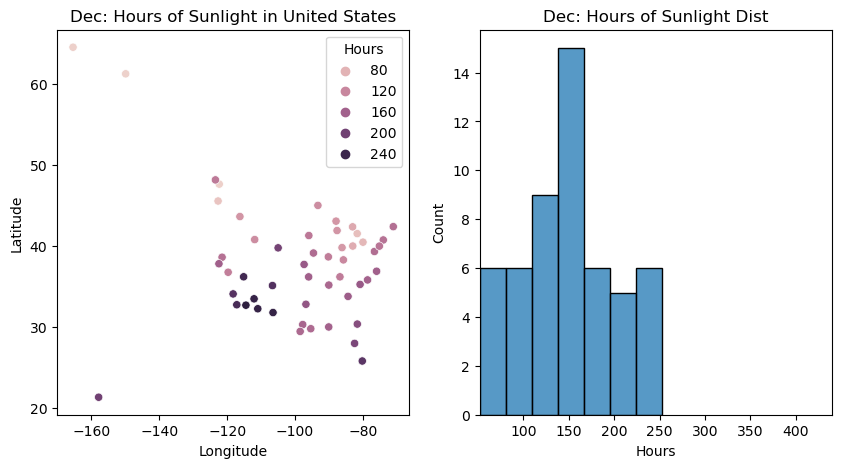

In [13]:
for month in df["Month"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    data = df[df["Month"]==month]
    sns.scatterplot(data, y="Latitude", x="Longitude", hue="Hours", ax=axes[0]).set(title="{}: Hours of Sunlight in {}".format(month, country_of_interest))
    sns.histplot(data, x="Hours", ax=axes[1]).set(title="{}: Hours of Sunlight Dist".format(month))
    axes[0].set_xlim()
    axes[1].set_xlim(min(df["Hours"]), max(df["Hours"]))
    
    plt.show()

In [14]:
df = df.dropna()

In [15]:
y = df["Hours"]
X = df

In [16]:
X = X[["Latitude","Longitude","Month"]]

Month needs to be converted to numeric, but we also want to treat it as a cyclic value.  
Jan and Dec are close to each other, but if we do a simple encoding, they'll appear as 1 and 12.

In [17]:
def convert_month(month):
    month_map = {"Jan":1.0,"Feb":2.0, "Mar":3.0,
                 "Apr":4.0,"May":5.0,"Jun":6.0,
                 "Jul":7.0,"Aug":8.0,"Sep":9.0,
                 "Oct":10.0,"Nov":11.0,"Dec":12.0}
    return month_map[month]
X["Month"] = X["Month"].map(lambda x: convert_month(x))

/tmp/ipykernel_21/2762499266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Month"] = X["Month"].map(lambda x: convert_month(x))


In [18]:
X['month_sin'] = np.sin(2 * np.pi * X['Month']/12.0)
X['month_cos'] = np.cos(2 * np.pi * X['Month']/12.0)

/tmp/ipykernel_21/2710221780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month_sin'] = np.sin(2 * np.pi * X['Month']/12.0)
/tmp/ipykernel_21/2710221780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month_cos'] = np.cos(2 * np.pi * X['Month']/12.0)


In [19]:
X = X[["Latitude","Longitude","month_sin","month_cos"]]
X

,Latitude,Longitude,month_sin,month_cos
0,35.084103,-106.650985,5.000000e-01,8.660254e-01
1,35.084103,-106.650985,8.660254e-01,5.000000e-01
2,35.084103,-106.650985,1.000000e+00,6.123234e-17
3,35.084103,-106.650985,8.660254e-01,-5.000000e-01
4,35.084103,-106.650985,5.000000e-01,-8.660254e-01
...,...,...,...,...
643,32.665135,-114.476032,-8.660254e-01,-5.000000e-01
644,32.665135,-114.476032,-1.000000e+00,-1.836970e-16
645,32.665135,-114.476032,-8.660254e-01,5.000000e-01
646,32.665135,-114.476032,-5.000000e-01,8.660254e-01


In [20]:
X.describe()

,Latitude,Longitude,month_sin,month_cos
count,624.000000,624.000000,6.240000e+02,6.240000e+02
mean,37.885463,-99.968577,-7.116814e-18,-4.697097e-17
std,7.367122,20.985408,7.076741e-01,7.076741e-01
min,21.304547,-165.398799,-1.000000e+00,-1.000000e+00
25%,33.280395,-114.644153,-5.915064e-01,-5.915064e-01
50%,37.735631,-95.653037,-6.123234e-17,-6.123234e-17
75%,40.884401,-83.035157,5.915064e-01,5.915064e-01
max,64.498992,-71.060511,1.000000e+00,1.000000e+00


Cross Validation of RandomForestRegressor

In [21]:
clf = RandomForestRegressor()
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.94113716, 0.86402718, 0.91644531, 0.83383542, 0.89766246])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

In [23]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9266160655881708

In [24]:
y_pred = clf.predict(X_test)
mean_absolute_error(y_test, y_pred)

15.091029126213572

Ends with a score of 0.93 and MAE of 14.7 hours